In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
##Prereqs for plotly and cufflinks
##plotly connects pandas and python to an interactive JS library
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True) ##connects the javascript to the notebook
cf.go_offline()
##ignore all warnings!! Use warnings.filterwarnings(action='once') instead to see the warnings once
import warnings
warnings.filterwarnings('ignore')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [9]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [10]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Exploratory Data Analysis
--

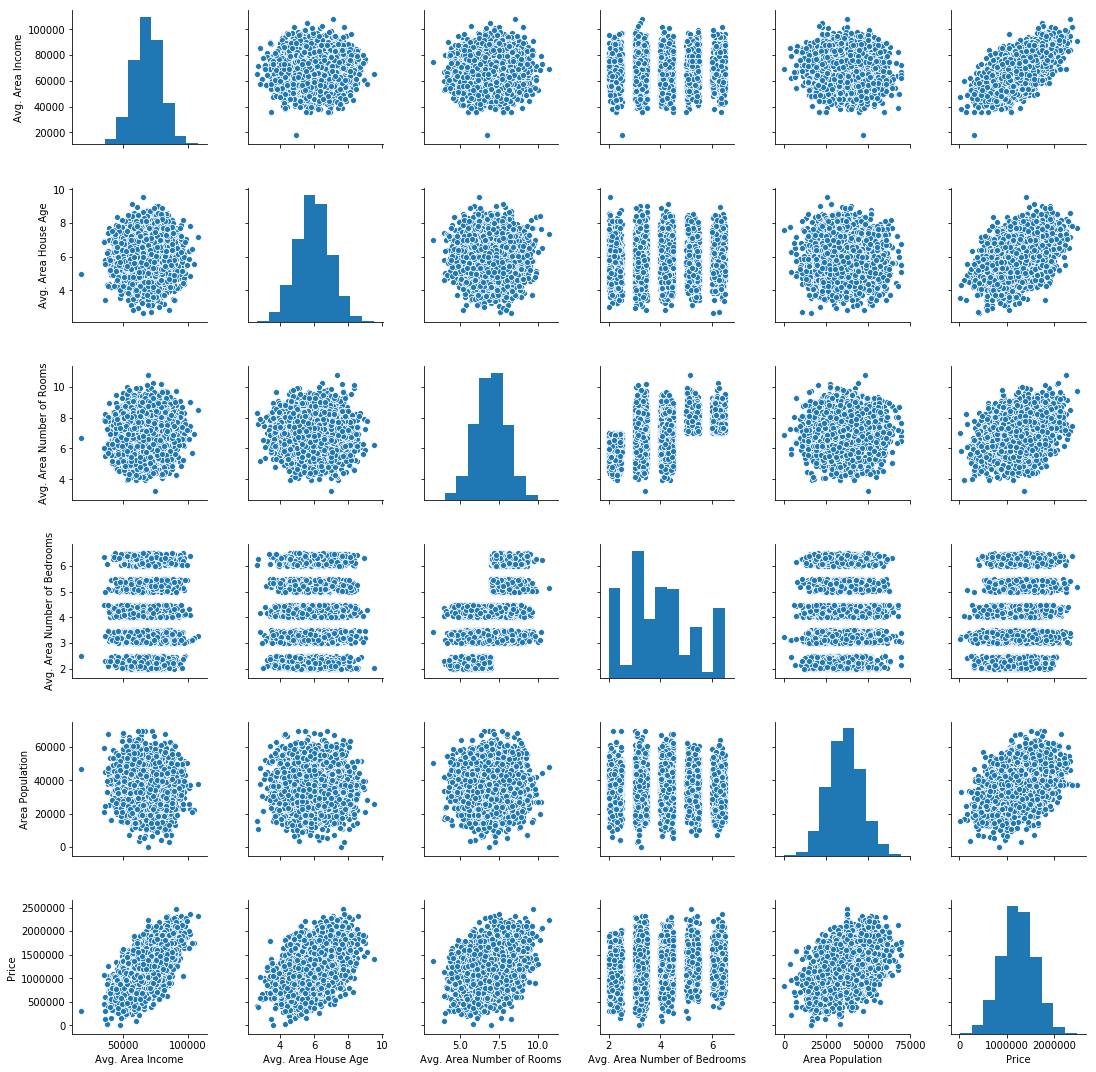

In [11]:
sns.pairplot(USAhousing)

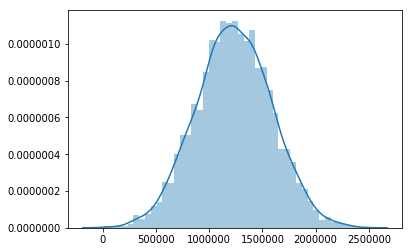

In [12]:
sns.distplot(USAhousing[['Price']])

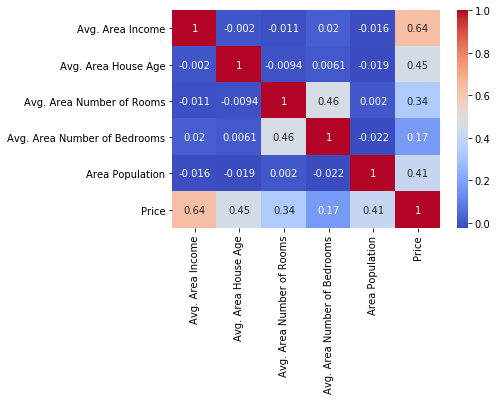

In [13]:
sns.heatmap(USAhousing.corr(),cmap='coolwarm',annot=True)

# LINEAR REGRESSION

In [14]:
##Get the columns
USAhousing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [15]:
##Features
X = USAhousing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
               'Avg. Area Number of Bedrooms', 'Area Population']]
##Target Variable
y = USAhousing['Price']

In [16]:
##Splitting the data into training and test set
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
#initiate an instance of Linear Regression Model
lm = LinearRegression()

In [20]:
#fit the model onto the training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Model Evaluation
--

In [21]:
# print the intercept
print(lm.intercept_)

-2640159.796851911


In [22]:
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [23]:
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [24]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [25]:
#Coefficient for each feature(Explained in detail in the book http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Sixth%20Printing.pdf)
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


# Predictions from Linear Regression

In [26]:
#Creating the price predictions
predictions = lm.predict(X_test)

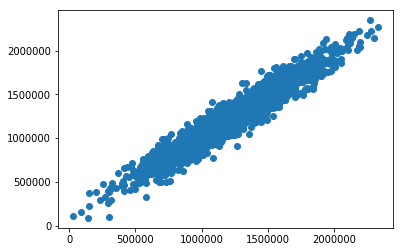

In [27]:
#Comparing agianst actual prices
plt.scatter(y_test,predictions)

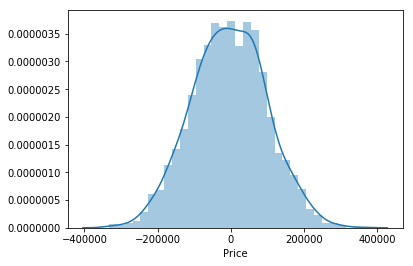

In [28]:
#Residuals - difference between actuals and predicted values
sns.distplot((y_test-predictions))

REGRESSION EVALUATION METRICS
--
The idea is to minimize the following to create the best model
<br><br>
**Mean Absolute Error (MAE)** is the mean of the absolute value of the errors or average error.<br /> 
**Mean Squared Error (MSE)** is the mean of the squared errors. MSE "punishes" larger errors, which tends to be useful in the real world.<br /> 
**Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors. RMSE is interpretable in the "y" units.



In [29]:
from sklearn import metrics

In [30]:
#MAE
metrics.mean_absolute_error(y_test,predictions)

82288.22251914957

In [31]:
#MSE
metrics.mean_squared_error(y_test,predictions)

10460958907.209501

In [32]:
##RMSE
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291153

# BIAS VARIANCE TRADE OFF
Adds noise by adding model complexity<br>
Training error goes down and test goes up<br>

# LOGISTIC REGRESSION
Also known as the Sigmoid function<br>
A method for classification<br>
Unlike linear regression where we try to predict continuous values, logistic regression deals with discrete values<br>


In [39]:
ttrain = pd.read_csv('titanic_train.csv')

In [40]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


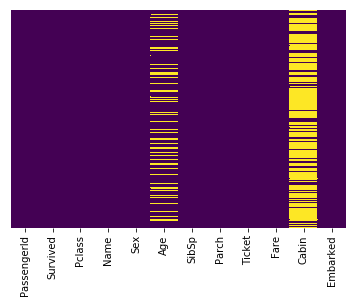

In [41]:
##Creating a heatmap to check for missing data points
sns.heatmap(ttrain.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [42]:
##We can see that some of the age and a lot of the cabin data is missing. We can either replace the missing data with 
##some random data or remove the column if needed

In [43]:
##Exploratory Analysis
sns.set_style('whitegrid')

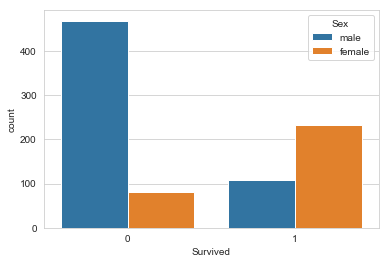

In [44]:
sns.countplot(x='Survived',hue='Sex', data=ttrain)
##More women survived in comparison to men

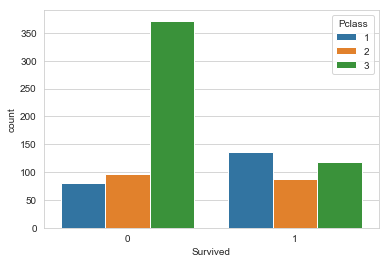

In [45]:
sns.countplot(x='Survived',hue='Pclass', data=ttrain)
##Most passengers class 3 people did not survive

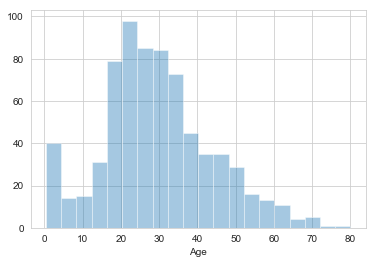

In [46]:
sns.distplot(ttrain['Age'].dropna(),kde=False)
##Most people were in the age bracket 20-40

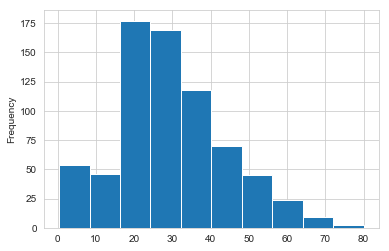

In [47]:
ttrain['Age'].plot.hist()
##same as the previous plot except we are using pandas directly

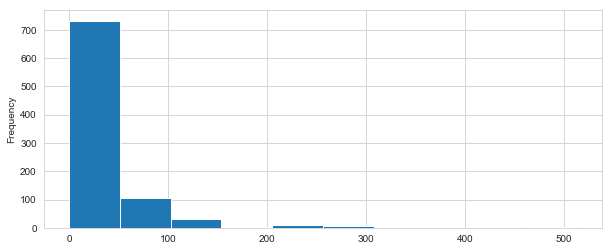

In [48]:
ttrain['Fare'].plot.hist(figsize=(10,4))
##Distribution of the fares

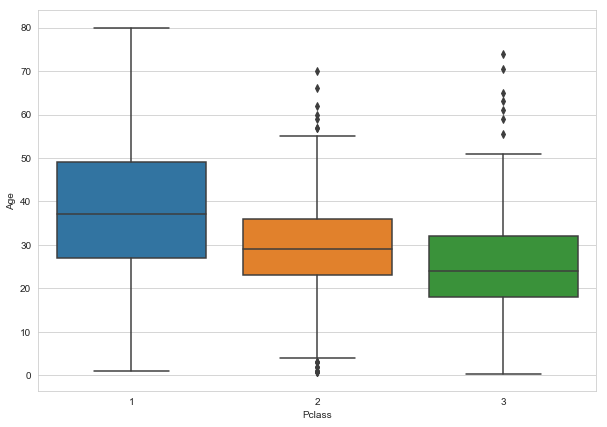

In [49]:
##Filling in the missing data for the Age column(impute) with the average age of all the passengers based on Pclass
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=ttrain)

In [50]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age): ##if the Age value is null we do the following
        
        if Pclass == 1:
            return 37 ##return average Age of the Pclass 1
        elif Pclass == 2:
            return 29 ##return average Age of the Pclass 2
        else:
            return 24 ##return average Age of the Pclass 3
    else:
        return Age ##return average age

In [51]:
ttrain['Age']=ttrain[['Age','Pclass']].apply(impute_age,axis=1)

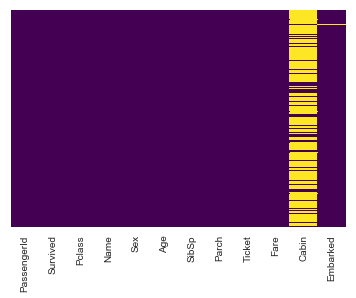

In [52]:
##The missing values for the age are udpated and we no longer have missing values for the column
sns.heatmap(ttrain.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [53]:
##Since there are too many missing values in the Cabin column we just drop that column
ttrain.drop('Cabin',axis=1,inplace=True)#axis=1 for column and inplace=True for the column to be replaced from the
#actual dataframe as can be checked from the head()
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


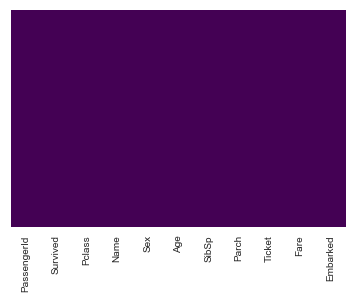

In [54]:
##Removing all the remaining missing values
ttrain.dropna(inplace=True)
sns.heatmap(ttrain.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [55]:
##Now we have removed all the missing values and cleaned up the data, next we need to present the data in a format that
##can be interpreted by the ML algorithms. For example, the 'Sex' column has 'male' and 'female' strings which cannot be
##interpreted by the ML algorithm so we introduce dummy variables for the categories
sex = pd.get_dummies(ttrain['Sex'],drop_first=True) #converts categorical variables into dummies also known as indicator
#variables and we drop the first column as this would produce 2 columns that are exact predictors of each other

In [56]:
embark = pd.get_dummies(ttrain['Embarked'],drop_first=True)

In [57]:
ttrain = pd.concat([ttrain,sex,embark],axis=1)#concatenating the new columns with the original dataframe

In [58]:
ttrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [59]:
##Removing the unused/unusable/duplicate columns from the dataframe
ttrain.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1, inplace=True)

In [60]:
ttrain.head()#all numerical data remains now which can easily be passed to the machine learning algorithm

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [61]:
X = ttrain.drop('Survived',axis=1)
y = ttrain['Survived']

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
logmodel = LogisticRegression()

In [66]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [67]:
predictions = logmodel.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
print(confusion_matrix(y_test,predictions))

[[148  15]
 [ 36  68]]


# K Nearest Neighbors
The predicction algorithm categorizes the new data point based on the training data and the proximity of the new data to the (k nearest) neighbors and their classification

In [76]:
dfknn = pd.read_csv('Classified Data',index_col=0)

In [77]:
dfknn.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scalar = StandardScaler()

In [80]:
scalar.fit(dfknn.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [81]:
scaled_features = scalar.transform(dfknn.drop('TARGET CLASS',axis=1))#create a scaled version of the actual values

In [82]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [84]:
dffeature = pd.DataFrame(scaled_features,columns=dfknn.columns[:-1])#Load the features dataframe and use the columns 
#from the actual dataframe minus the target column

In [85]:
dffeature.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [86]:
from sklearn.model_selection import train_test_split

In [87]:
#Splititng the data into X and y for creating the train and test sets
X = dffeature
y = dfknn['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [88]:
##Using the KNN classifier
from sklearn.neighbors import KNeighborsClassifier

In [89]:
knn = KNeighborsClassifier(n_neighbors=1) #setting number of neighbors(=k in the knn) as 1

In [90]:
knn.fit(X_train,y_train) #fitting the test and the train data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [91]:
pred = knn.predict(X_test) #extracting predictions from the data to do evaluation

In [92]:
#For evaluation
from sklearn.metrics import confusion_matrix,classification_report

In [93]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [94]:
#Although the prediction values are already quite precise we can make it better by using the elbow method to get an 
#even better value for k

In [95]:
error_rate = []

for i in range(1,40): #checking for k in between 1 to 40(can choose any range here)
    knn = KNeighborsClassifier(n_neighbors=i) #create a model at each k=i value
    knn.fit(X_train,y_train)#fit it
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #average of where the predictions were not equal to the actual test values

Text(0.5,0,'K value')

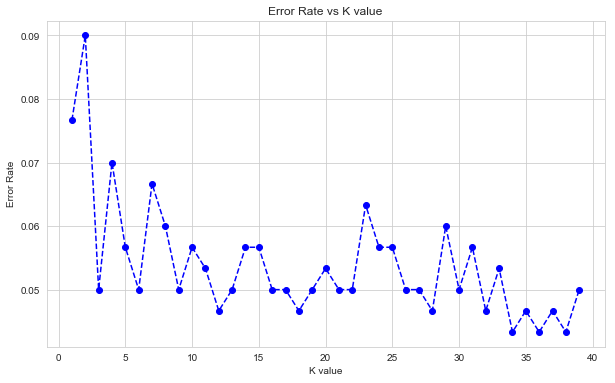

In [96]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',ls='--',marker='o')
plt.title('Error Rate vs K value')
plt.ylabel('Error Rate')
plt.xlabel('K value')

In [97]:
## We can see that the error dips down at ~ k =17. We could go for an even higher k value but that would need more 
## compuation

In [98]:
##Testing the confusion matrix and classification report against the new k value =17
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]


             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



In [99]:
## we can see an increase in precision from 0.92 to 0.95

# Decision Trees and Random Forests

In [105]:
kdf = pd.read_csv('kyphosis.csv')

In [106]:
kdf.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [107]:
##EDA

In [108]:
kdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


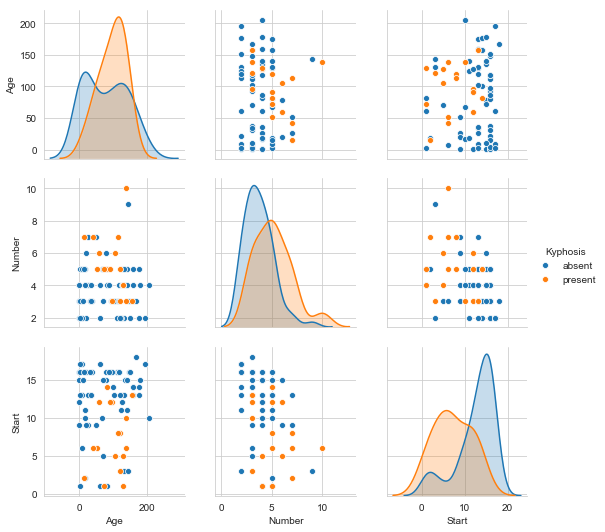

In [109]:
sns.pairplot(kdf, hue='Kyphosis')

In [110]:
#Train Test fit
X = kdf.drop('Kyphosis',axis=1)
y = kdf['Kyphosis']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
dtree = DecisionTreeClassifier()

In [114]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [115]:
kpredict = dtree.predict(X_test)

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
print(confusion_matrix(y_test,kpredict))
print('\n')
print(classification_report(y_test,kpredict))

[[15  2]
 [ 7  1]]


             precision    recall  f1-score   support

     absent       0.68      0.88      0.77        17
    present       0.33      0.12      0.18         8

avg / total       0.57      0.64      0.58        25



In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
rfc = RandomForestClassifier(n_estimators=200)

In [121]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [122]:
rfc_pred = rfc.predict(X_test)

In [123]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[16  1]
 [ 7  1]]


             precision    recall  f1-score   support

     absent       0.70      0.94      0.80        17
    present       0.50      0.12      0.20         8

avg / total       0.63      0.68      0.61        25



# Support Vector Machines
Supervised learning models with associated learning algorithms

In [125]:
from sklearn.datasets import load_breast_cancer

In [126]:
cancer = load_breast_cancer()

In [127]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [128]:
df_feat = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [130]:
df_feat.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [132]:
X = df_feat
y = cancer['target']

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [135]:
##Training the Support Vector Classifier
from sklearn.svm import SVC

In [136]:
model = SVC()

In [137]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [138]:
predictions = model.predict(X_test)

In [139]:
from sklearn.metrics import classification_report,confusion_matrix

In [141]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  0  66]
 [  0 105]]


             precision    recall  f1-score   support

          0       0.00      0.00      0.00        66
          1       0.61      1.00      0.76       105

avg / total       0.38      0.61      0.47       171



In [142]:
##We see that the precision and f1-score are 0 here or in other words its unable to detect any tumors. We need to adjust
## our model's parametes. We can search for the correct parameters using Grid Search

In [143]:
from sklearn.grid_search import GridSearchCV

In [152]:
pgrid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [153]:
grid = GridSearchCV(SVC(),param_grid=pgrid,verbose=3)

In [154]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ......................... C=1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.631579 -   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......................... C=1, gamma=0.1, score=0.636364 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.631579 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.631579 -   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ........................ C=1, gamma=0.01, score=0.636364 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.902256 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [159]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [156]:
grid.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [157]:
grid_predictions = grid.predict(X_test)

In [160]:
print(confusion_matrix(y_test,grid_predictions))
print('\n')
print(classification_report(y_test,grid_predictions))

[[ 60   6]
 [  3 102]]


             precision    recall  f1-score   support

          0       0.95      0.91      0.93        66
          1       0.94      0.97      0.96       105

avg / total       0.95      0.95      0.95       171



# K-Means Clustering 
This unsupervised algorithm attempts to group similar clusters together in the data

In [171]:
from sklearn.datasets import make_blobs ## create random test data to be used for testing on different algorithms

In [172]:
data = make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.8,random_state=101)

In [173]:
data #its a tuple of numpy array

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

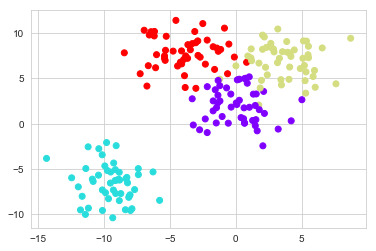

In [177]:
plt.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

In [223]:
from sklearn.cluster import KMeans

In [179]:
kmeans = KMeans(n_clusters=4)

In [180]:
kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [181]:
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735]])

In [182]:
kmeans.labels_

array([1, 3, 0, 3, 3, 2, 3, 0, 3, 0, 1, 0, 3, 3, 1, 0, 3, 0, 2, 1, 2, 0,
       0, 2, 1, 2, 2, 0, 3, 3, 1, 2, 3, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 1,
       0, 3, 1, 0, 2, 0, 0, 1, 3, 0, 2, 1, 0, 0, 1, 3, 2, 3, 2, 1, 3, 0,
       2, 3, 3, 2, 3, 0, 2, 0, 2, 3, 3, 0, 1, 0, 0, 2, 3, 2, 0, 0, 0, 1,
       0, 2, 2, 2, 2, 0, 0, 2, 3, 1, 2, 3, 0, 2, 0, 0, 3, 0, 2, 3, 2, 2,
       3, 1, 1, 3, 2, 3, 1, 1, 3, 1, 0, 1, 0, 1, 0, 3, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 1, 3, 1, 3, 0, 2, 3, 2, 1, 1, 3, 0, 2, 1, 1, 1, 1, 0, 3,
       0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 2, 1, 0, 3, 1, 0, 3, 0, 1, 3, 0, 1,
       3, 3, 2, 3, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 3, 3, 1, 2, 0, 3, 3,
       2, 0], dtype=int32)

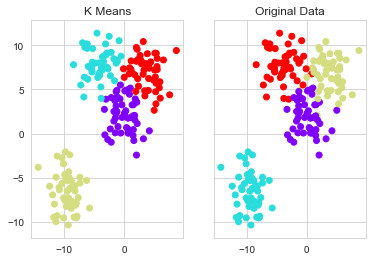

In [189]:
#Comparing the original data with the data clustered as per the KMeans

fig, (ax1,ax2) = plt.subplots(1,2, sharey=True) 

ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')

ax2.set_title('Original Data')
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

# Principal Component Analysis

Also known as General Factor Analysis. It is an unsupervised statistical technique used for examining interrelations between a set of variables in order to determine the underlying structure of those variables

In [197]:
print(cancer['DESCR'])
##Using the breast cancer dataset to run a PCA. We use this ananlysis usually when there are too many dimensions 
##in question. PCA can help identify the 'principal components' of the datasets.

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [198]:
cdf = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [199]:
cdf.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [200]:
from sklearn.preprocessing import StandardScaler

In [201]:
scalar = StandardScaler()

In [202]:
scalar.fit(cdf)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [203]:
scaled_data = scalar.transform(cdf)

In [204]:
#PCA
from sklearn.decomposition import PCA

In [205]:
pca = PCA(n_components=2)

In [206]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [207]:
x_pca = pca.transform(scaled_data)

In [208]:
scaled_data.shape

(569, 30)

In [209]:
x_pca.shape

(569, 2)

Text(0,0.5,'Second Principal Component')

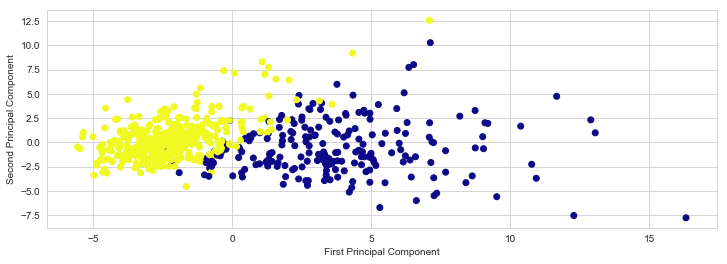

In [213]:
plt.figure(figsize=(12,4))
plt.scatter(x_pca[:,0],x_pca[:,1], c=cancer['target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [214]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [215]:
compdf = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

In [216]:
compdf

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


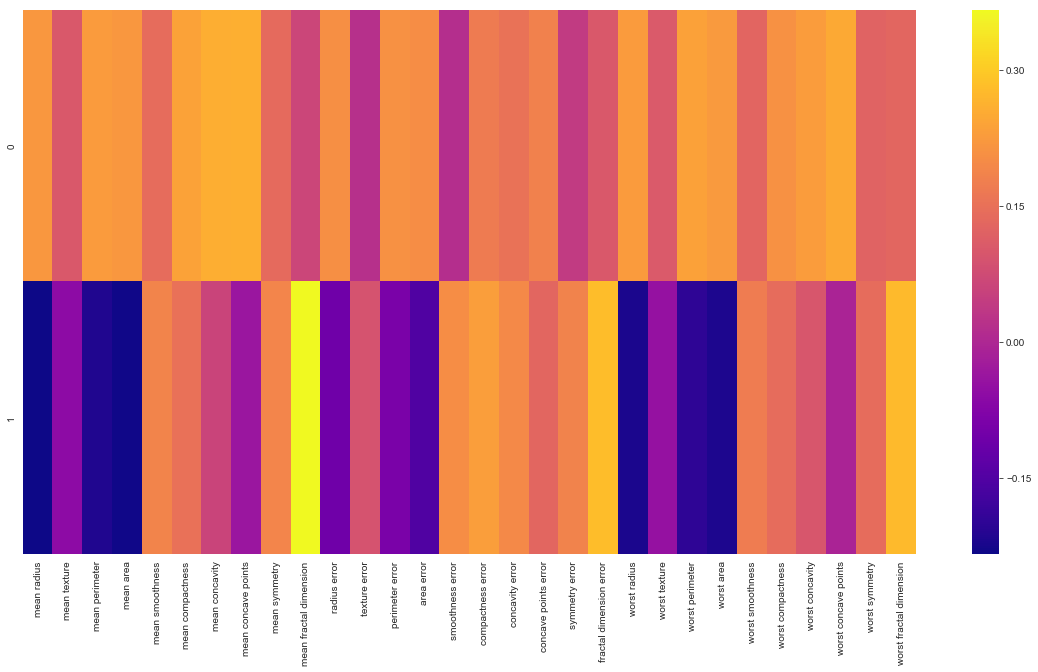

In [222]:
plt.figure(figsize=(20,10))
sns.heatmap(compdf,cmap='plasma')

# Recommender Systems
Could be Content Based(filtering based on the similarity between items) or Collaborative Filtering(filtering based on the user(crowd) preferences)
#Examples not covered in this notebook